# Логистическая регрессия

Обучим логистическую регрессию для предсказания того, откликнется клиент  
на рекламное предложение (target = 1) или нет (target = 0).

## Подключение библиотек, загрузка и обзор данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/clients_data.csv')

In [3]:
data.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
0,49,1,0,1,2,1,5000.0,1,1,2,0
1,32,1,0,1,3,3,12000.0,1,1,1,0
2,52,1,0,1,4,0,9000.0,2,1,0,0
3,39,1,0,1,1,1,25000.0,1,1,3,0
4,30,1,0,0,0,0,12000.0,2,1,2,0


In [4]:
from sklearn.model_selection import train_test_split

X = data.drop('TARGET', axis=1)
y = data['TARGET']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=123)

## Практика

**Задание**  
Выведите на экран количество объектов каждого класса. Сколько процентов объектов относятся к положительному классу?  
Ответ округлите до целого числа (например, если доля объектов положительного класса равна 0.412, в ответ запишите 41,  
имея в виду 41 процент).

In [5]:
data["TARGET"].value_counts()[1]/data['TARGET'].shape[0]

np.float64(0.1190304145043684)

Обучим логистическую регрессию с параметрами по умолчанию.

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [7]:
lr.fit(Xtrain, ytrain)

prediction = lr.predict(Xtest)
prediction

array([0, 0, 0, ..., 0, 0, 0], shape=(4567,))

Метрику accuracy не стоит использовать при сильном дисбалансе классов. Поэтому посчитайте f1_score для оценки качества модели на тестовых данных.

f1_score принимает значения от 0 до 1. Чем ближе к 1, тем лучше модель.

In [8]:
from sklearn.metrics import f1_score

f1score = f1_score(ytest, prediction)
f1score

0.0

**Вопрос**  
Чему равен `f1_score`?

Удивительно, да?

Давайте разберемся, почему качество такое низкое.

Предскажем вероятности классов с помощью обученной логистической регрессии на тестовых данных.

In [9]:
probs_test = lr.predict_proba(Xtest)

probs_test[:10]

array([[0.93860103, 0.06139897],
       [0.90059304, 0.09940696],
       [0.71082856, 0.28917144],
       [0.78458545, 0.21541455],
       [0.87089467, 0.12910533],
       [0.95850908, 0.04149092],
       [0.93632094, 0.06367906],
       [0.96561656, 0.03438344],
       [0.94889192, 0.05110808],
       [0.93090964, 0.06909036]])

По вероятностям видно, что вероятности отнесения к положительному классу очень низкие.

Попробуем изменить порог для перевода вероятности в классы.

**Вопрос**  
Чему равен `f1_score`, если все объекты с вероятностью не меньшей 0.1, относить к положительному классу?

Ответ округлите до сотых.

In [10]:
new_ytest = np.where(probs_test[:,1] >= 0.1, 1, 0)
new_f1_test = f1_score(ytest, new_ytest)
new_f1_test

0.25485122897800777

У обученной модели можно посмотреть веса (как и в линейной регрессии).  
Выведем на экран веса модели (`model.coef_`, `model.intercept_`).

In [11]:
lr.coef_, lr.intercept_

(array([[-4.61783077e-02, -1.47054474e-01, -8.61156206e-02,
         -1.54078976e-01,  1.91466340e-01, -1.41684328e-01,
          2.01723704e-05, -6.01031506e-02, -2.31272424e-01,
          2.92924307e-01]]),
 array([-0.24168577]))

Создайте `pd.DataFrame`, где в первом столбце стоят названия признаков, а во втором - их веса (так удобнее анализировать результат).  
Отсортируйте таблицу по убыванию весов.

**Вопрос**  
Какой признак имеет наибольший положительный вес?

In [12]:
names = data.columns.drop('TARGET')
df = pd.DataFrame({ 
    'names': names,
    'weights': lr.coef_[0,:]
})
df

,names,weights
0,AGE,-0.046178
1,SOCSTATUS_WORK_FL,-0.147054
2,SOCSTATUS_PENS_FL,-0.086116
3,GENDER,-0.154079
4,CHILD_TOTAL,0.191466
5,DEPENDANTS,-0.141684
6,PERSONAL_INCOME,0.000020
7,LOAN_NUM_TOTAL,-0.060103
8,LOAN_NUM_CLOSED,-0.231272
9,LOAN_DLQ_NUM,0.292924


In [13]:

df = pd.DataFrame(index= X.columns, data= lr.coef_[0], columns=['weights'])
df

,weights
AGE,-0.046178
SOCSTATUS_WORK_FL,-0.147054
SOCSTATUS_PENS_FL,-0.086116
GENDER,-0.154079
CHILD_TOTAL,0.191466
DEPENDANTS,-0.141684
PERSONAL_INCOME,0.000020
LOAN_NUM_TOTAL,-0.060103
LOAN_NUM_CLOSED,-0.231272
LOAN_DLQ_NUM,0.292924


## Бонус

**Задание 1**  
Подберите порог для перевода вероятностей в классы, дающий максимальное значение `f1_score`.

Text(819, 0.2651113467656416, '(819, 0.265)')

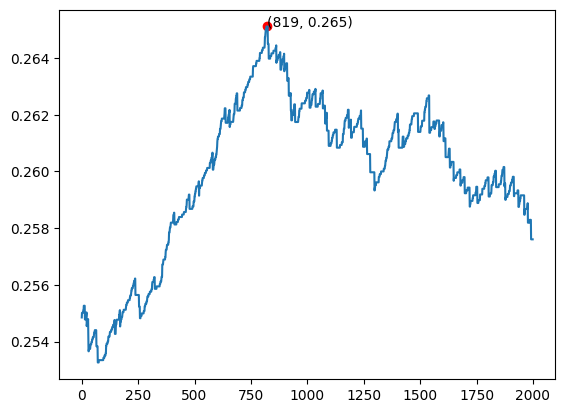

In [ ]:
start=0.1
step=0.00001
iter = 2000

ytests = [ np.where(probs_test[:,1]>=start + step*i, 1, 0) for i in range(iter)]
new_f1_tests = [ f1_score(ytest, ytests[i]) for i in range(iter)]

mindex = np.argmax(new_f1_tests)

plt.plot(range(0,iter,1), new_f1_tests)
plt.scatter(mindex, new_f1_tests[mindex], c='red')
plt.text(mindex, new_f1_tests[mindex], f'({mindex}, {new_f1_tests[mindex]:.3f})')


**Задание 2**  
Во вложенном цикле подберите одновременно коэффициент регуляризации `C` у логистической регрессии и порог для перевода вероятностей в классы, дающие максимальное значение `f1_score`.

По-хорошему, чтобы не переобучиться, эти величины надо подбирать не по тесту, а по отдельной выборке.

Поэтому разобъем данные изначально на три части: `Xtrain`, `Xval`, `Xtest`.

*   В цикле при подборе `С` и порога будем обучаться по `Xtrain`, а предсказывать и измерять качество по `Xval`.

*   Качество итоговой модели с найденными `C` и порогом измерьте по `Xtest`.

Так не переобучимся!


In [36]:
Xtrain_new, Xval, ytrain_new, yval = train_test_split(Xtrain, ytrain, train_size=0.7, random_state=123)

# ваш код для подбора C и порога здесь

In [54]:
C = np.arange(1.62, 1.66, 0.001)
thresholds = np.arange(0.1, 0.14, 0.001)

cmax, thresholdMax, f1Max = 0, 0, 0
for c in C:
    for threshold in thresholds:
        model = LogisticRegression(C = c)

        model.fit(Xtrain, ytrain) # обучаемся на всех тренировочных данных

        prediction = model.predict_proba(Xtest)

        classes = np.where(prediction[:,1]>=threshold, 1, 0) # переведите полученные вероятности в классы по найденному порогу
        
        f1 = f1_score(ytest, classes)
        if f1Max < f1:
            f1Max = f1
            cmax = c
            thresholdMax = threshold
print(cmax, thresholdMax, f1Max)

1.6429999999999976 0.12600000000000003 0.26666666666666666
